<a href="https://colab.research.google.com/github/Morganblabla/Estadistica/blob/main/U4Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad IV Practica I

Estadistica Inferencial II

Paulina Morgan Jimènez

23150264

Señala si hay diferencia significativa considerando cada variable categórica:
etnia,	nivel educativo de los padres,	tipo de comida,	curso de preparación para el examen, sexo


In [35]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Morganblabla/Estadistica/refs/heads/main/Student_Performance_new.csv")
df.dropna(inplace = True)
df

,Unnamed: 0,etnia,nivel_educativo_de_los_padres,tipo_de_comida,curso_de_preparación_para_el_examen,porcentaje_de_matematicas,porcentaje_de_lectura,porcentaje_de_escritura,sexo
0,0,group_B,licenciatura,estandar,nada,0.72,0.72,0.74,mujer
1,1,group_C,algo_de_universidad,estandar,completado,0.69,0.90,0.88,mujer
2,2,group_B,maestria,estandar,nada,0.90,0.95,0.93,mujer
3,3,group_A,tecnico_asociado,subsidiado,nada,0.47,0.57,0.44,hombre
4,4,group_C,algo_de_universidad,estandar,nada,0.76,0.78,0.75,hombre
...,...,...,...,...,...,...,...,...,...
995,995,group_E,maestria,estandar,completado,0.88,0.99,0.95,mujer
996,996,group_C,preparatoria,subsidiado,nada,0.62,0.55,0.55,hombre
997,997,group_C,preparatoria,subsidiado,completado,0.59,0.71,0.65,mujer
998,998,group_D,algo_de_universidad,estandar,completado,0.68,0.78,0.77,mujer


# ETNIA

**Variable dependiente: porcentaje_de_matematicas**

**Variable categórica: etnia**

In [36]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [37]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA para cada grupo de etnia
anova_result = stats.f_oneway(
    df[df['etnia'] == 'group_A']['porcentaje_de_matematicas'],
    df[df['etnia'] == 'group_B']['porcentaje_de_matematicas'],
    df[df['etnia'] == 'group_C']['porcentaje_de_matematicas'],
    df[df['etnia'] == 'group_D']['porcentaje_de_matematicas'],
    df[df['etnia'] == 'group_E']['porcentaje_de_matematicas']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")


Resultados del ANOVA:
F-Estadístico: 14.59
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_A group_B   0.0182 0.8724 -0.0336 0.0701  False
group_A group_C   0.0283 0.4968   -0.02 0.0767  False
group_A group_D   0.0573 0.0138  0.0078 0.1068   True
group_A group_E   0.1219    0.0  0.0672 0.1766   True
group_B group_C   0.0101 0.9452 -0.0269 0.0471  False
group_B group_D   0.0391  0.044  0.0006 0.0776   True
group_B group_E   0.1037    0.0  0.0587 0.1486   True
group_C group_D    0.029  0.129 -0.0047 0.0626  False
group_C group_E   0.0936    0.0  0.0527 0.1345   True
group_D group_E   0.0646 0.0003  0.0223 0.1068   True
-----------------------------------------------------


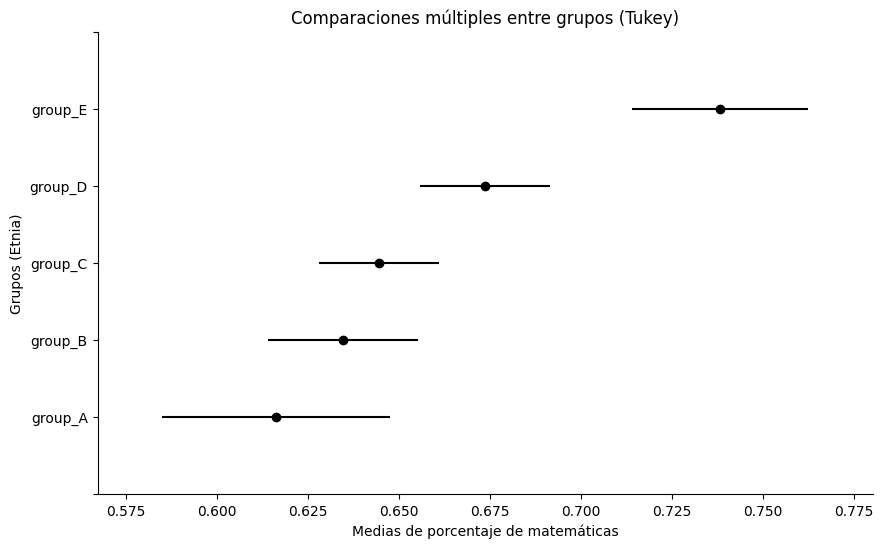

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_matematicas'], groups=df['etnia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje de matemáticas")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()


**Conclusiòn:** El análisis mostró que hay diferencias significativas en el rendimiento en matemáticas entre los grupos de etnia. En particular, los grupos group_D y group_E tienen un desempeño diferente al de los otros grupos, mientras que group_A, group_B y group_C no presentan diferencias relevantes entre sí. Esto indica que la etnia puede influir en el rendimiento en matemáticas para algunos grupos.

**Variable dependiente: porcentaje_de_lectura**

**Variable categórica: etnia**

In [39]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [40]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA para cada grupo de etnia
anova_result = stats.f_oneway(
    df[df['etnia'] == 'group_A']['porcentaje_de_lectura'],
    df[df['etnia'] == 'group_B']['porcentaje_de_lectura'],
    df[df['etnia'] == 'group_C']['porcentaje_de_lectura'],
    df[df['etnia'] == 'group_D']['porcentaje_de_lectura'],
    df[df['etnia'] == 'group_E']['porcentaje_de_lectura']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 5.62
Valor p: 0.00018

Conclusión: Hay diferencias significativas entre al menos dos grupos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_A group_B   0.0268  0.601  -0.024 0.0776  False
group_A group_C   0.0443 0.0799 -0.0031 0.0917  False
group_A group_D   0.0536 0.0219  0.0051 0.1021   True
group_A group_E   0.0835 0.0002  0.0299 0.1371   True
group_B group_C   0.0175 0.6784 -0.0187 0.0537  False
group_B group_D   0.0268 0.2955 -0.0109 0.0645  False
group_B group_E   0.0568 0.0041  0.0127 0.1008   True
group_C group_D   0.0093 0.9396 -0.0237 0.0422  False
group_C group_E   0.0393 0.0582 -0.0008 0.0793  False
group_D group_E     0.03 0.2767 -0.0114 0.0714  False
-----------------------------------------------------


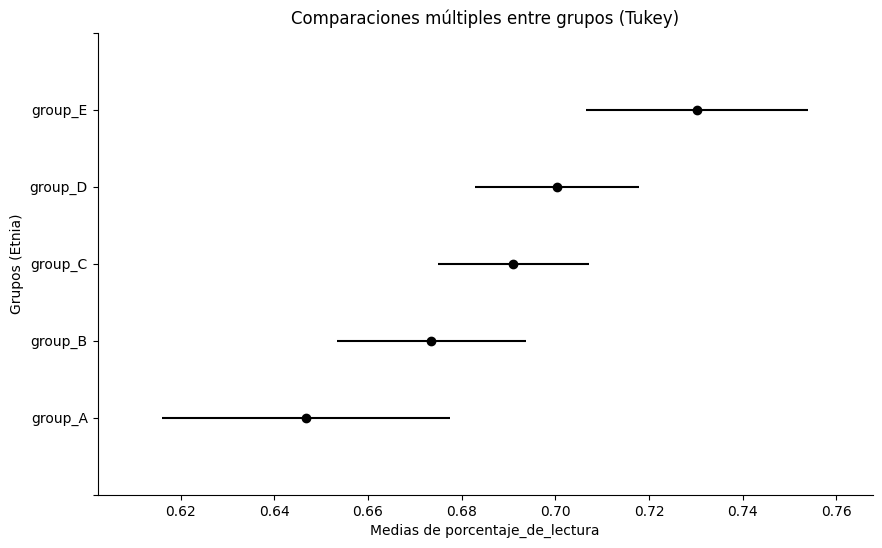

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_lectura'], groups=df['etnia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_lectura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

**Conclusiòn:** El análisis indica que existen diferencias significativas en el rendimiento de lectura entre algunos grupos de etnia. En particular, group_A y group_E se diferencian significativamente, así como group_A con group_D, y group_B con group_E. Otros pares no mostraron diferencias importantes.

Esto sugiere que la etnia influye en el desempeño en lectura en ciertos grupos, aunque no en todos.

**Variable dependiente: porcentaje_de_escritura**

**Variable categórica: etnia**

In [42]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [43]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA para cada grupo de etnia
anova_result = stats.f_oneway(
    df[df['etnia'] == 'group_A']['porcentaje_de_escritura'],
    df[df['etnia'] == 'group_B']['porcentaje_de_escritura'],
    df[df['etnia'] == 'group_C']['porcentaje_de_escritura'],
    df[df['etnia'] == 'group_D']['porcentaje_de_escritura'],
    df[df['etnia'] == 'group_E']['porcentaje_de_escritura']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 7.16
Valor p: 0.00001

Conclusión: Hay diferencias significativas entre al menos dos grupos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
group_A group_B   0.0293 0.5513 -0.0234  0.082  False
group_A group_C   0.0515 0.0346  0.0024 0.1007   True
group_A group_D   0.0747 0.0005  0.0244  0.125   True
group_A group_E   0.0873 0.0002  0.0317 0.1429   True
group_B group_C   0.0223 0.4853 -0.0153 0.0599  False
group_B group_D   0.0455 0.0133  0.0064 0.0845   True
group_B group_E   0.0581 0.0049  0.0124 0.1038   True
group_C group_D   0.0232 0.3445  -0.011 0.0574  False
group_C group_E   0.0358 0.1296 -0.0058 0.0774  False
group_D group_E   0.0126 0.9297 -0.0303 0.0556  False
-----------------------------------------------------


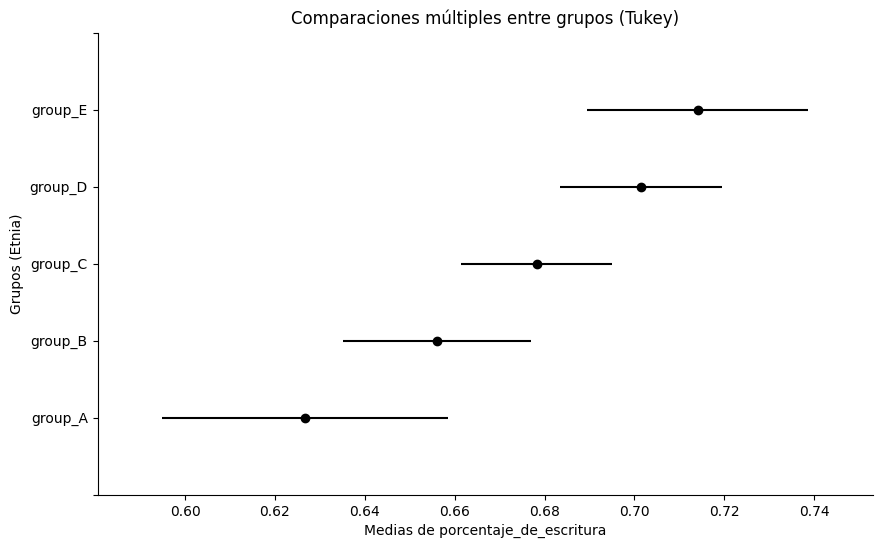

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_escritura'], groups=df['etnia'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_escritura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

**Conclusiòn:** El análisis revela diferencias significativas en el rendimiento de escritura entre varios grupos de etnia. En particular, group_A muestra un desempeño significativamente diferente respecto a group_C, group_D y group_E. También hay diferencias entre group_B y group_D y entre group_B y group_E. Otros pares no presentan diferencias relevantes.

Esto indica que la etnia influye en el desempeño en escritura para ciertos grupos, mostrando variabilidad en sus promedios.

# nivel_educativo_de_los_padres

**Variable dependiente: porcentaje_de_matematicas**

**Variable categórica: nivel_educativo_de_los_padres**

In [45]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [46]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA para cada grupo de nivel_educativo_de_los_padres
anova_result = stats.f_oneway(
    df[df['nivel_educativo_de_los_padres'] == 'group_A']['porcentaje_de_matematicas'],
    df[df['nivel_educativo_de_los_padres'] == 'group_B']['porcentaje_de_matematicas'],
    df[df['nivel_educativo_de_los_padres'] == 'group_C']['porcentaje_de_matematicas'],
    df[df['nivel_educativo_de_los_padres'] == 'group_D']['porcentaje_de_matematicas'],
    df[df['nivel_educativo_de_los_padres'] == 'group_E']['porcentaje_de_matematicas']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: nan
Valor p: nan

Conclusión: No hay diferencias significativas entre los grupos.


<ipython-input-46-9baeb77516bd>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(


              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------
algo_de_preparatoria algo_de_universidad   0.0363 0.1482 -0.0064   0.079  False
algo_de_preparatoria        licenciatura   0.0589 0.0119  0.0083  0.1096   True
algo_de_preparatoria            maestria   0.0625 0.0611 -0.0016  0.1266  False
algo_de_preparatoria        preparatoria  -0.0136 0.9515 -0.0577  0.0306  False
algo_de_preparatoria    tecnico_asociado   0.0439 0.0418   0.001  0.0868   True
 algo_de_universidad        licenciatura   0.0226 0.7676 -0.0259  0.0711  False
 algo_de_universidad            maestria   0.0262 0.8384 -0.0363  0.0886  False
 algo_de_universidad        preparatoria  -0.0499 0.0086 -0.0916 -0.0082   True
 algo_de_universidad    tecnico_asociado   0.0075 0.9948 -0.0328  0.0479  False
        licenciatura            maestria

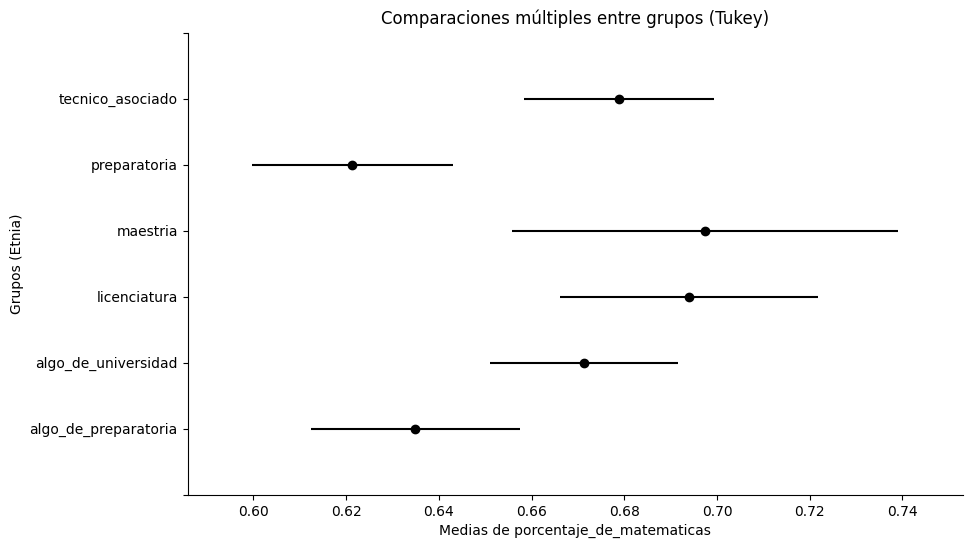

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_matematicas'], groups=df['nivel_educativo_de_los_padres'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_matematicas")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

**Conclusiòn:**  El nivel educativo de los padres tiene un efecto significativo en el rendimiento de los estudiantes en matemáticas. Se observaron diferencias notables en el desempeño entre estudiantes cuyos padres tienen distintos niveles educativos, lo que sugiere que un mayor nivel educativo parental está asociado con mejores resultados académicos en esta materia.

**Variable dependiente: porcentaje_de_lectura**

**Variable categórica: nivel_educativo_de_los_padres**

In [48]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [49]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA para cada grupo de nivel_educativo_de_los_padres
anova_result = stats.f_oneway(
    df[df['nivel_educativo_de_los_padres'] == 'group_A']['porcentaje_de_lectura'],
    df[df['nivel_educativo_de_los_padres'] == 'group_B']['porcentaje_de_lectura'],
    df[df['nivel_educativo_de_los_padres'] == 'group_C']['porcentaje_de_lectura'],
    df[df['nivel_educativo_de_los_padres'] == 'group_D']['porcentaje_de_lectura'],
    df[df['nivel_educativo_de_los_padres'] == 'group_E']['porcentaje_de_lectura']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: nan
Valor p: nan

Conclusión: No hay diferencias significativas entre los grupos.


<ipython-input-49-bca607382d66>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(


              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------
algo_de_preparatoria algo_de_universidad   0.0252 0.4913 -0.0157  0.0661  False
algo_de_preparatoria        licenciatura   0.0606  0.005  0.0122  0.1091   True
algo_de_preparatoria            maestria   0.0843 0.0013   0.023  0.1457   True
algo_de_preparatoria        preparatoria  -0.0223 0.6575 -0.0646  0.0199  False
algo_de_preparatoria    tecnico_asociado   0.0399 0.0622 -0.0011  0.0809  False
 algo_de_universidad        licenciatura   0.0354 0.2487  -0.011  0.0818  False
 algo_de_universidad            maestria   0.0591 0.0541 -0.0006  0.1188  False
 algo_de_universidad        preparatoria  -0.0476 0.0089 -0.0874 -0.0077   True
 algo_de_universidad    tecnico_asociado   0.0147 0.8872 -0.0239  0.0533  False
        licenciatura            maestria

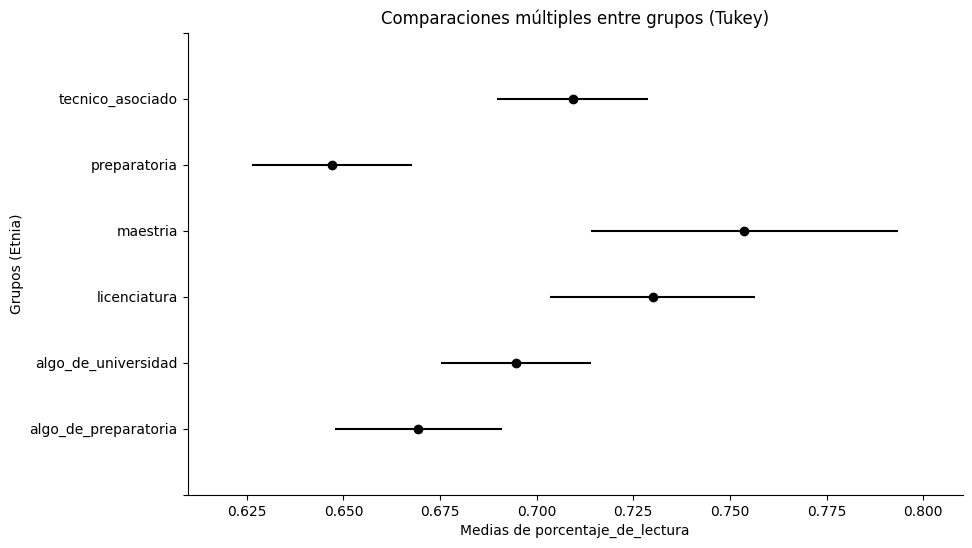

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_lectura'], groups=df['nivel_educativo_de_los_padres'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_lectura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

**Conclusiòn:** El nivel educativo de los padres influye significativamente en el rendimiento en lectura de los estudiantes. Se observaron diferencias claras entre algunos grupos, especialmente entre aquellos con padres que tienen niveles educativos más altos (licenciatura, maestría) y aquellos con niveles más bajos (preparatoria, algo_de_preparatoria). Esto indica que a mayor nivel educativo parental, mejor es el desempeño en lectura de los estudiantes.

**Variable dependiente: porcentaje_de_escritura**

**Variable categórica: nivel_educativo_de_los_padres**

In [51]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [52]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA para cada grupo de nivel_educativo_de_los_padres
anova_result = stats.f_oneway(
    df[df['nivel_educativo_de_los_padres'] == 'group_A']['porcentaje_de_escritura'],
    df[df['nivel_educativo_de_los_padres'] == 'group_B']['porcentaje_de_escritura'],
    df[df['nivel_educativo_de_los_padres'] == 'group_C']['porcentaje_de_escritura'],
    df[df['nivel_educativo_de_los_padres'] == 'group_D']['porcentaje_de_escritura'],
    df[df['nivel_educativo_de_los_padres'] == 'group_E']['porcentaje_de_escritura']
)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: nan
Valor p: nan

Conclusión: No hay diferencias significativas entre los grupos.


<ipython-input-52-506992ba610f>:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(


              Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------------------
algo_de_preparatoria algo_de_universidad   0.0395  0.079 -0.0025  0.0815  False
algo_de_preparatoria        licenciatura   0.0849    0.0  0.0351  0.1347   True
algo_de_preparatoria            maestria   0.1079    0.0  0.0448  0.1709   True
algo_de_preparatoria        preparatoria  -0.0244  0.596 -0.0678   0.019  False
algo_de_preparatoria    tecnico_asociado   0.0501 0.0095  0.0079  0.0923   True
 algo_de_universidad        licenciatura   0.0454 0.0726 -0.0023  0.0931  False
 algo_de_universidad            maestria   0.0684 0.0189   0.007  0.1298   True
 algo_de_universidad        preparatoria  -0.0639 0.0001 -0.1049 -0.0229   True
 algo_de_universidad    tecnico_asociado   0.0106 0.9741 -0.0291  0.0502  False
        licenciatura            maestria

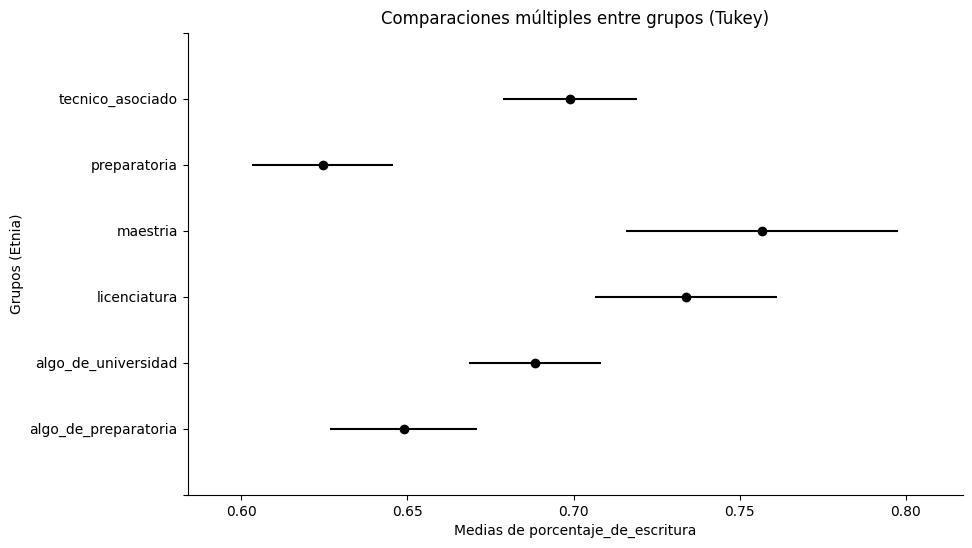

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_escritura'], groups=df['nivel_educativo_de_los_padres'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_escritura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

**Conclusiòn:** El nivel educativo de los padres tiene un impacto significativo en el rendimiento en escritura de los estudiantes. Se observaron diferencias importantes entre estudiantes cuyos padres tienen niveles educativos más altos, como licenciatura y maestría, comparados con aquellos cuyos padres tienen niveles más bajos, como preparatoria o algo_de_preparatoria. Esto indica que un mayor nivel educativo parental se asocia con mejores resultados en escritura.

# tipo_de_comida

**Variable dependiente: porcentaje_de_matematicas**

**Variable categórica: tipo_de_comida**

In [90]:
df['tipo_de_comida'].value_counts()

,count
tipo_de_comida,
estandar,645
subsidiado,355


In [54]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [89]:
import scipy.stats as stats

grupo_nada = df[df['tipo_de_comida'] == 'estandar']['porcentaje_de_matematicas']
grupo_completado = df[df['tipo_de_comida'] == 'subsidiado']['porcentaje_de_matematicas']

anova_result = stats.f_oneway(grupo_nada, grupo_completado)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.3f}")
print(f"Valor p: {anova_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 140.119
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
estandar subsidiado  -0.1111   0.0 -0.1296 -0.0927   True
---------------------------------------------------------


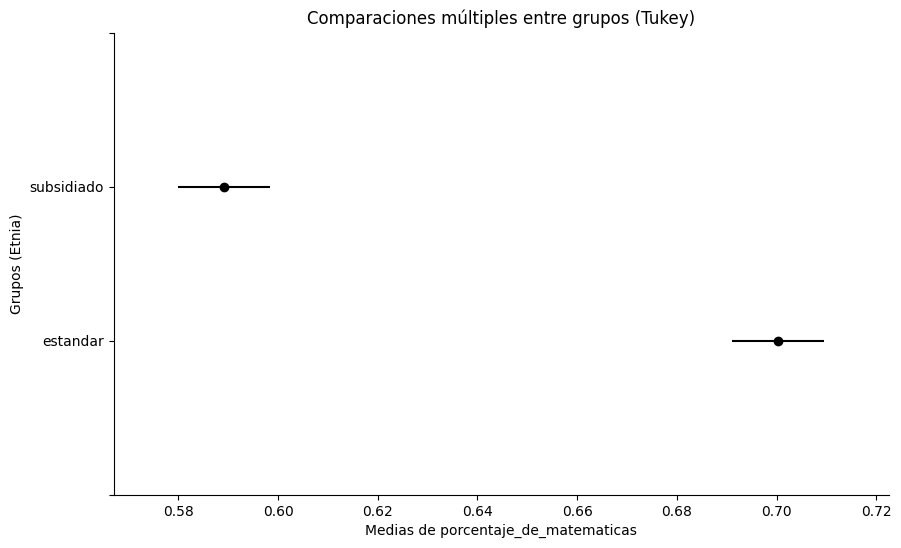

In [56]:
# Aqui era mejor T de student por que solo hay dos grupos, equis hare los 2.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_matematicas'], groups=df['tipo_de_comida'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_matematicas")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

In [87]:
from scipy import stats

grupo_nada = df[df['tipo_de_comida'] == 'estandar']['porcentaje_de_matematicas']
grupo_completado = df[df['tipo_de_comida'] == 'subsidiado']['porcentaje_de_matematicas']

# Prueba t de Student (Welch, no asume varianzas iguales)
t_stat, p_value = stats.ttest_ind(grupo_nada, grupo_completado, equal_var=False)

print(f"T-Estadístico: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

T-Estadístico: 11.484
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


**Variable dependiente: porcentaje_de_lectura**

**Variable categórica: tipo_de_comida**

In [58]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [85]:
import scipy.stats as stats

grupo_nada = df[df['tipo_de_comida'] == 'estandar']['porcentaje_de_lectura']
grupo_completado = df[df['tipo_de_comida'] == 'subsidiado']['porcentaje_de_lectura']

anova_result = stats.f_oneway(grupo_nada, grupo_completado)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.3f}")
print(f"Valor p: {anova_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 55.518
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
estandar subsidiado    -0.07   0.0 -0.0884 -0.0516   True
---------------------------------------------------------


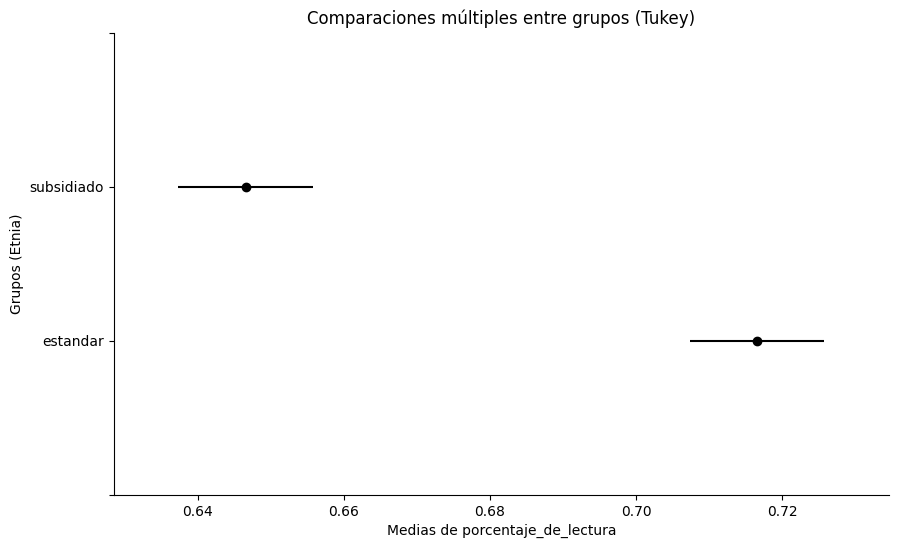

In [60]:
# Aqui era mejor T de student por que solo hay dos grupos, equis.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_lectura'], groups=df['tipo_de_comida'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_lectura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

In [86]:
from scipy import stats

grupo_nada = df[df['tipo_de_comida'] == 'estandar']['porcentaje_de_lectura']
grupo_completado = df[df['tipo_de_comida'] == 'subsidiado']['porcentaje_de_lectura']

# Prueba t de Student (Welch, no asume varianzas iguales)
t_stat, p_value = stats.ttest_ind(grupo_nada, grupo_completado, equal_var=False)

print(f"T-Estadístico: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

T-Estadístico: 7.293
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


**Variable dependiente: porcentaje_de_escritura**

**Variable categórica: tipo_de_comida**

In [62]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [84]:
import scipy.stats as stats

grupo_nada = df[df['tipo_de_comida'] == 'estandar']['porcentaje_de_escritura']
grupo_completado = df[df['tipo_de_comida'] == 'subsidiado']['porcentaje_de_escritura']

anova_result = stats.f_oneway(grupo_nada, grupo_completado)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.3f}")
print(f"Valor p: {anova_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 64.157
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
estandar subsidiado   -0.078   0.0 -0.0971 -0.0589   True
---------------------------------------------------------


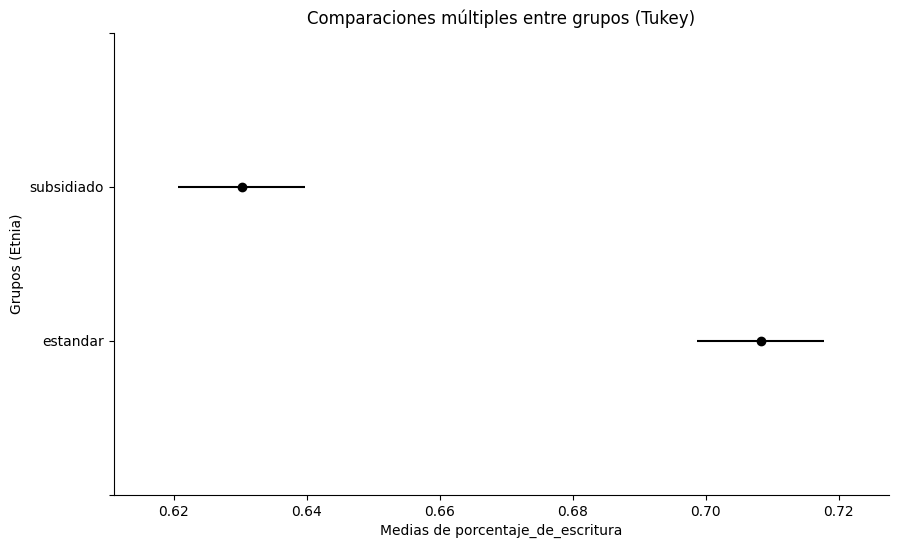

In [64]:
# Aqui era mejor T de student por que solo hay dos grupos, equis.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_escritura'], groups=df['tipo_de_comida'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_escritura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

In [83]:
from scipy import stats

grupo_nada = df[df['tipo_de_comida'] == 'estandar']['porcentaje_de_escritura']
grupo_completado = df[df['tipo_de_comida'] == 'subsidiado']['porcentaje_de_escritura']

# Prueba t de Student (Welch, no asume varianzas iguales)
t_stat, p_value = stats.ttest_ind(grupo_nada, grupo_completado, equal_var=False)

print(f"T-Estadístico: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

T-Estadístico: 7.841
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


# curso_de_preparación_para_el_examen

**Variable dependiente: porcentaje_de_matematicas**

**Variable categórica: curso_de_preparación_para_el_examen**

In [71]:
df['curso_de_preparación_para_el_examen'].value_counts()

,count
curso_de_preparación_para_el_examen,
nada,642
completado,358


In [66]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [74]:
import scipy.stats as stats

grupo_nada = df[df['curso_de_preparación_para_el_examen'] == 'nada']['porcentaje_de_matematicas']
grupo_completado = df[df['curso_de_preparación_para_el_examen'] == 'completado']['porcentaje_de_matematicas']

anova_result = stats.f_oneway(grupo_nada, grupo_completado)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.3f}")
print(f"Valor p: {anova_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")


Resultados del ANOVA:
F-Estadístico: 32.543
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
completado   nada  -0.0562   0.0 -0.0755 -0.0369   True
-------------------------------------------------------


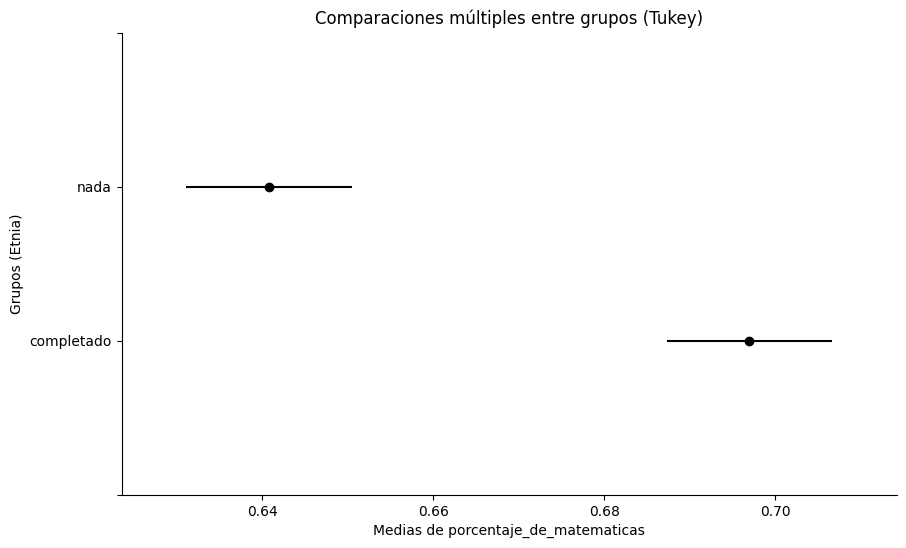

In [68]:
# Aqui era mejor T de student por que solo hay dos grupos, equis.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_matematicas'], groups=df['curso_de_preparación_para_el_examen'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_matematicas")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

In [73]:
from scipy import stats

grupo_nada = df[df['curso_de_preparación_para_el_examen'] == 'nada']['porcentaje_de_matematicas']
grupo_completado = df[df['curso_de_preparación_para_el_examen'] == 'completado']['porcentaje_de_matematicas']

# Prueba t de Student (Welch, no asume varianzas iguales)
t_stat, p_value = stats.ttest_ind(grupo_nada, grupo_completado, equal_var=False)

print(f"T-Estadístico: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

T-Estadístico: -5.787
Valor p: 0.00000
Hay diferencias significativas entre los grupos de preparación para el examen.


**Variable dependiente: porcentaje_de_lectura**

**Variable categórica: curso_de_preparación_para_el_examen**

In [70]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [75]:
import scipy.stats as stats

grupo_nada = df[df['curso_de_preparación_para_el_examen'] == 'nada']['porcentaje_de_lectura']
grupo_completado = df[df['curso_de_preparación_para_el_examen'] == 'completado']['porcentaje_de_lectura']

anova_result = stats.f_oneway(grupo_nada, grupo_completado)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.3f}")
print(f"Valor p: {anova_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 61.963
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
completado   nada  -0.0736   0.0 -0.0919 -0.0552   True
-------------------------------------------------------


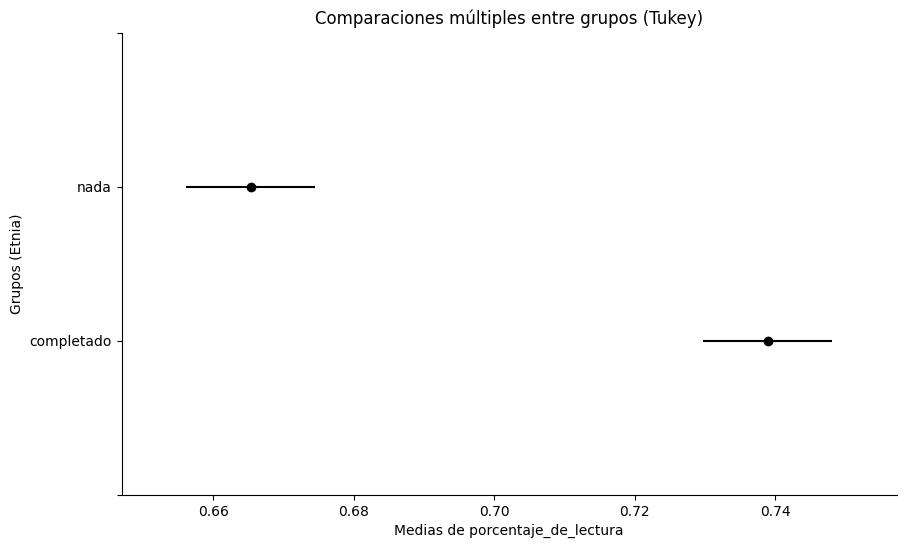

In [76]:
# Aqui era mejor T de student por que solo hay dos grupos, equis.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_lectura'], groups=df['curso_de_preparación_para_el_examen'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_lectura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

In [77]:
from scipy import stats

grupo_nada = df[df['curso_de_preparación_para_el_examen'] == 'nada']['porcentaje_de_lectura']
grupo_completado = df[df['curso_de_preparación_para_el_examen'] == 'completado']['porcentaje_de_lectura']

# Prueba t de Student (Welch, no asume varianzas iguales)
t_stat, p_value = stats.ttest_ind(grupo_nada, grupo_completado, equal_var=False)

print(f"T-Estadístico: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

T-Estadístico: -8.004
Valor p: 0.00000
Hay diferencias significativas entre los grupos de preparación para el examen.


**Variable dependiente: porcentaje_de_escritura**

**Variable categórica: curso_de_preparación_para_el_examen**

In [79]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [78]:
import scipy.stats as stats

grupo_nada = df[df['curso_de_preparación_para_el_examen'] == 'nada']['porcentaje_de_escritura']
grupo_completado = df[df['curso_de_preparación_para_el_examen'] == 'completado']['porcentaje_de_escritura']

anova_result = stats.f_oneway(grupo_nada, grupo_completado)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.3f}")
print(f"Valor p: {anova_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 108.351
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj  lower   upper  reject
-------------------------------------------------------
completado   nada  -0.0991   0.0 -0.1178 -0.0805   True
-------------------------------------------------------


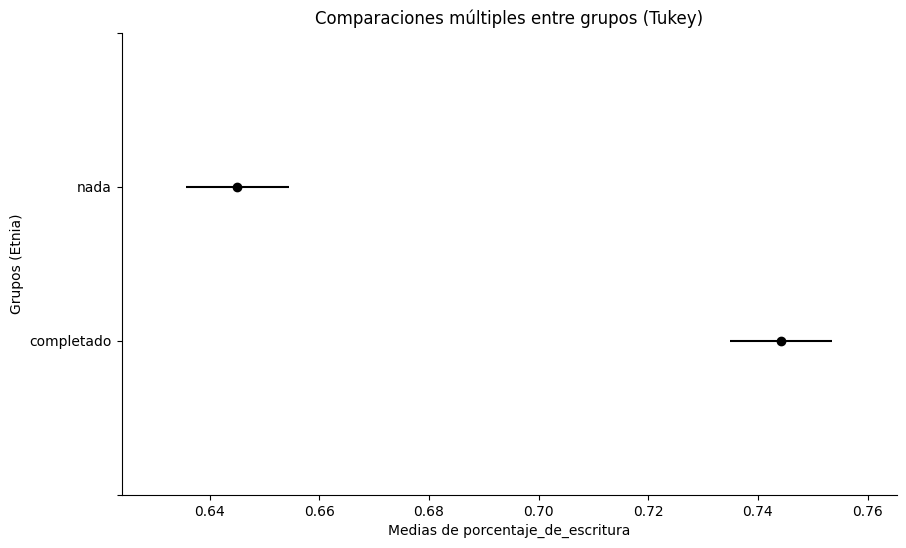

In [80]:
# Aqui era mejor T de student por que solo hay dos grupos, equis.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_escritura'], groups=df['curso_de_preparación_para_el_examen'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_escritura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

In [81]:
from scipy import stats

grupo_nada = df[df['curso_de_preparación_para_el_examen'] == 'nada']['porcentaje_de_escritura']
grupo_completado = df[df['curso_de_preparación_para_el_examen'] == 'completado']['porcentaje_de_escritura']

# Prueba t de Student (Welch, no asume varianzas iguales)
t_stat, p_value = stats.ttest_ind(grupo_nada, grupo_completado, equal_var=False)

print(f"T-Estadístico: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

T-Estadístico: -10.753
Valor p: 0.00000
Hay diferencias significativas entre los grupos de preparación para el examen.


# Sexo

**Variable dependiente: porcentaje_de_matematicas**

**Variable categórica: sexo**

In [91]:
df['sexo'].value_counts()

,count
sexo,
mujer,518
hombre,482


In [92]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [93]:
import scipy.stats as stats

grupo_nada = df[df['sexo'] == 'mujer']['porcentaje_de_matematicas']
grupo_completado = df[df['sexo'] == 'hombre']['porcentaje_de_matematicas']

anova_result = stats.f_oneway(grupo_nada, grupo_completado)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.3f}")
print(f"Valor p: {anova_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 28.979
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
hombre  mujer   -0.051   0.0 -0.0695 -0.0324   True
---------------------------------------------------


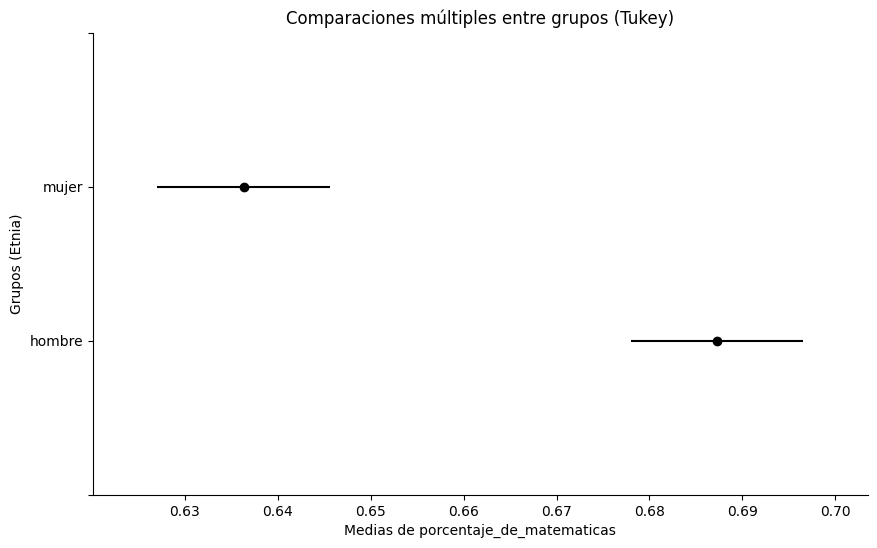

In [94]:
# Aqui era mejor T de student por que solo hay dos grupos, equis.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_matematicas'], groups=df['sexo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_matematicas")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

In [96]:
from scipy import stats

grupo_nada = df[df['sexo'] == 'mujer']['porcentaje_de_matematicas']
grupo_completado = df[df['sexo'] == 'hombre']['porcentaje_de_matematicas']

# Prueba t de Student (Welch, no asume varianzas iguales)
t_stat, p_value = stats.ttest_ind(grupo_nada, grupo_completado, equal_var=False)

print(f"T-Estadístico: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

T-Estadístico: -5.398
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


**Variable dependiente: porcentaje_de_lectura**

**Variable categórica: sexo**

In [98]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [97]:
import scipy.stats as stats

grupo_nada = df[df['sexo'] == 'mujer']['porcentaje_de_lectura']
grupo_completado = df[df['sexo'] == 'hombre']['porcentaje_de_lectura']

anova_result = stats.f_oneway(grupo_nada, grupo_completado)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.3f}")
print(f"Valor p: {anova_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 63.351
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
hombre  mujer   0.0714   0.0 0.0538 0.0889   True
-------------------------------------------------


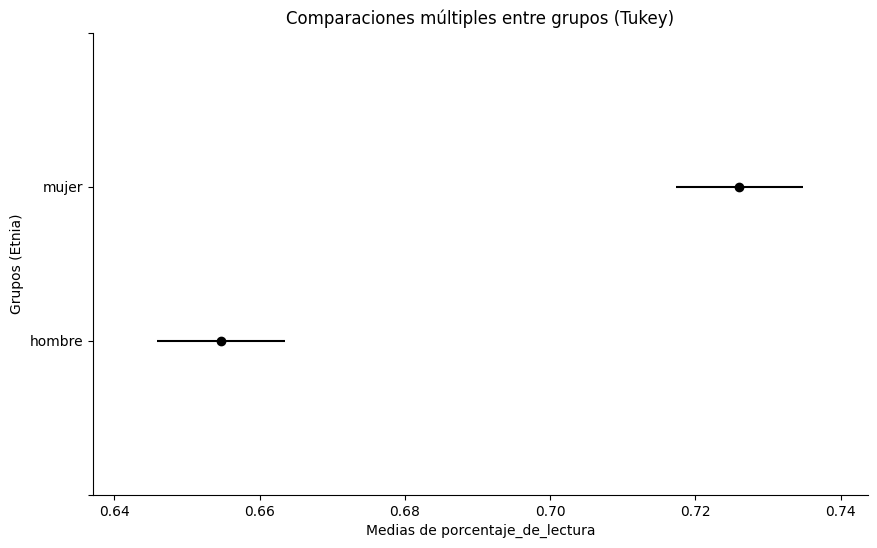

In [99]:
# Aqui era mejor T de student por que solo hay dos grupos, equis.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_lectura'], groups=df['sexo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_lectura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

In [100]:
from scipy import stats

grupo_nada = df[df['sexo'] == 'mujer']['porcentaje_de_lectura']
grupo_completado = df[df['sexo'] == 'hombre']['porcentaje_de_lectura']

# Prueba t de Student (Welch, no asume varianzas iguales)
t_stat, p_value = stats.ttest_ind(grupo_nada, grupo_completado, equal_var=False)

print(f"T-Estadístico: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

T-Estadístico: 7.968
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


**Variable dependiente: porcentaje_de_escritura**

**Variable categórica: sexo**

In [102]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [103]:
import scipy.stats as stats

grupo_nada = df[df['sexo'] == 'mujer']['porcentaje_de_escritura']
grupo_completado = df[df['sexo'] == 'hombre']['porcentaje_de_escritura']

anova_result = stats.f_oneway(grupo_nada, grupo_completado)

print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.3f}")
print(f"Valor p: {anova_result.pvalue:.5f}")

if anova_result.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

Resultados del ANOVA:
F-Estadístico: 99.592
Valor p: 0.00000
Hay diferencias significativas entre los grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
hombre  mujer   0.0916   0.0 0.0736 0.1096   True
-------------------------------------------------


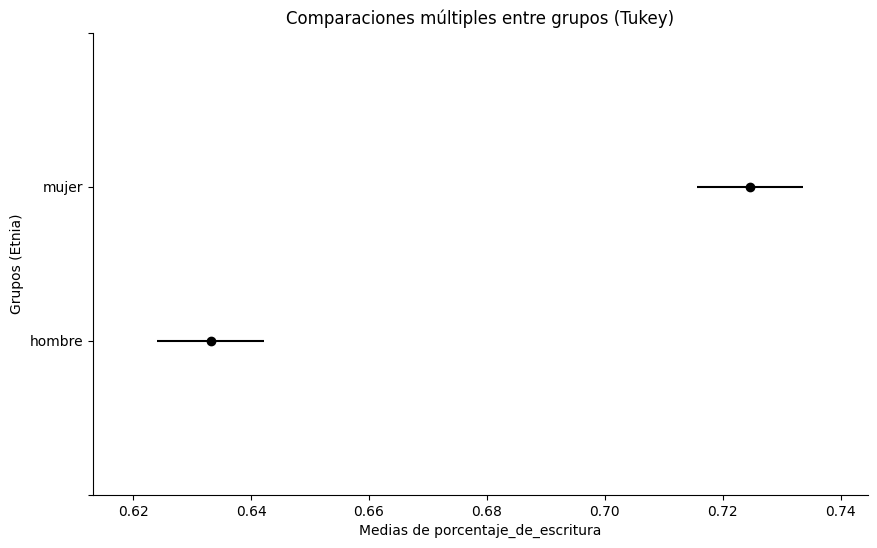

In [104]:
# Aqui era mejor T de student por que solo hay dos grupos, equis.
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_escritura'], groups=df['sexo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos (Etnia)", xlabel="Medias de porcentaje_de_escritura")

plt.gca().spines['right'].set_visible(False)  # derecha
plt.gca().spines['top'].set_visible(False)    # superior
plt.title("Comparaciones múltiples entre grupos (Tukey)")
plt.show()

In [105]:
from scipy import stats

grupo_nada = df[df['sexo'] == 'mujer']['porcentaje_de_escritura']
grupo_completado = df[df['sexo'] == 'hombre']['porcentaje_de_escritura']

# Prueba t de Student (Welch, no asume varianzas iguales)
t_stat, p_value = stats.ttest_ind(grupo_nada, grupo_completado, equal_var=False)

print(f"T-Estadístico: {t_stat:.3f}")
print(f"Valor p: {p_value:.5f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No hay diferencias significativas entre los grupos.")

T-Estadístico: 9.998
Valor p: 0.00000
Hay diferencias significativas entre los grupos.
